# MILESTONE

Link Dashboard: https://public.tableau.com/views/AnalisisDistribusiKopi-RidwanM_S_/Dashboard1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

# A. Perkenalan

'================================================='

Milestone

Nama  : Ridwan Muhammad Syahrul

Batch : RMT-029

Program ini dibuat untuk menganalisis data distribusi kopi di 94 negara pada rentang waktu 1 dekade terakhir (2013 - 2023).

'================================================='

# B. Identifikasi Masalah

## Business Understanding

Kamu adalah seorang data analyst yang tinggal di Indonesia dan kamu diminta oleh negara untuk menganalisis data distribusi kopi ke seluruh dunia. Tujuan kamu adalah melihat apakah kondisi ekspor/impor Indonesia sudah baik dan melihat perilaku konsumtif kopi masyarakat Indonesia

SMART Framework:
1. **Specific**: Mencari tahu berapa besar nilai ekspor/impor negara Indonesia dibandingkan negara lain.
2. **Measurable**: Mencapai peringkat 3 terbesar negara pengekspor di seluruh dunia.
3. **Achievable**: Melakukan survey atau data scraping mengenai konsumsi kopi diseluruh dunia.
4. **Relevant**: Dengan memilih partner negara yang membutuhkan kopi.
5. **Time-Bound**: Dapat dicapai dalam 1 tahun.

`Problem statement`:
Mengetahui distribusi kopi dan perilaku konsumtif tiap negara terhadap kopi import dan kopi yang dibuat sendiri dengan tujuan mencapai peringkat 3 terbesar pengekspor dengan melakukan menganalisis data konsumsi kopi di seluruh dunia dengan cara bekerja sama dengan negara yang membutuhkan kopi, hal ini dilakukan pada kurun waktu 1 tahun.

## Breaking Down Problem

- Penjabaran Masalah :
    1. Berapakah jumlah rata-rata domestic consumption dari tiap negara?
    2. Siapakah negara yang mengekspor kopi paling banyak?
    3. Siapakah negara yang mengimpor kopi paling banyak?
    4. Siapakah negara yang memiliki produksi terbesar?
    5. Seiring berjalannya waktu, apakah jumlah kopi yang dikonsumsi meningkat di negara Indonesia?
    6. Bagaimanakah hubungan antara produksi kopi negara dengan distribusinya?

# C. Data Loading

Data ini diambil dari website Kaggle dengan url: https://www.kaggle.com/datasets/parasrupani/coffee-distribution-across-94-counties

In [3]:
import pandas as pd

df = pd.read_csv('psd_coffee.csv')

df

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,Zimbabwe,2019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6012,Zimbabwe,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6013,Zimbabwe,2021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6014,Zimbabwe,2022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Perlu diketahui bahwa pada data set ini, satuan dari tiap kolom numerik adalah berbentuk karung dimana satu karung kopi berisi 60kg kopi

# D. Data Cleaning

In [22]:
#Pengecekan data yang ada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 6016 non-null   object
 1   Year                    6016 non-null   int64 
 2   Arabica Production      6016 non-null   int64 
 3   Bean Exports            6016 non-null   int64 
 4   Bean Imports            6016 non-null   int64 
 5   Beginning Stocks        6016 non-null   int64 
 6   Domestic Consumption    6016 non-null   int64 
 7   Ending Stocks           6016 non-null   int64 
 8   Exports                 6016 non-null   int64 
 9   Imports                 6016 non-null   int64 
 10  Other Production        6016 non-null   int64 
 11  Production              6016 non-null   int64 
 12  Roast & Ground Exports  6016 non-null   int64 
 13  Roast & Ground Imports  6016 non-null   int64 
 14  Robusta Production      6016 non-null   int64 
 15  Rst,

Di atas adalah daftar kolom yang ada pada data set ini. Kolom yang akan digunakan adalah Country, Year, Beginning Stocks, Domestic Consumption, Ending Stocks, Exports, Imports, Production, Total Distribution, dan Total Supply, sisanya akan didrop

In [23]:
# Pengecekan missing value pada data
df.isnull().sum()

Country                   0
Year                      0
Arabica Production        0
Bean Exports              0
Bean Imports              0
Beginning Stocks          0
Domestic Consumption      0
Ending Stocks             0
Exports                   0
Imports                   0
Other Production          0
Production                0
Roast & Ground Exports    0
Roast & Ground Imports    0
Robusta Production        0
Rst,Ground Dom. Consum    0
Soluble Dom. Cons.        0
Soluble Exports           0
Soluble Imports           0
Total Distribution        0
Total Supply              0
dtype: int64

Tidak ada missing value pada data, oleh karena itu tidak perlu dilakukan drop missing value

In [30]:
# Membuat dataframe baru untuk digunakan pada analisis ini
df_clean = df.copy()

Karena range waktu data terlalu luas, maka range waktu data diperkecil menjadi 1 dekade terakhir, yaitu 2013 - 2023.

In [31]:
# Membatasi data pada range waktu 1 dekade terkahir (2013-2023)
df_clean.drop(df_clean[df_clean['Year'] <= 2012].index, inplace=True)
# Drop kolom yang tidak dipakai
df_clean.drop(['Arabica Production','Robusta Production', 'Bean Exports', 'Bean Imports', 'Other Production', 'Roast & Ground Exports', 'Roast & Ground Imports', 'Robusta Production','Rst,Ground Dom. Consum', 'Soluble Dom. Cons.', 'Soluble Exports' , 'Soluble Imports'], axis=1, inplace=True)
# Reset index
df_clean= df_clean.reset_index(drop=True)

df_clean

,Country,Year,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Production,Total Distribution,Total Supply
0,Albania,2013,0,90,0,0,90,0,90,90
1,Albania,2014,0,100,0,0,100,0,100,100
2,Albania,2015,0,100,0,0,100,0,100,100
3,Albania,2016,0,105,0,0,105,0,105,105
4,Albania,2017,0,105,0,0,105,0,105,105
...,...,...,...,...,...,...,...,...,...,...
1029,Zimbabwe,2019,0,0,0,0,0,0,0,0
1030,Zimbabwe,2020,0,0,0,0,0,0,0,0
1031,Zimbabwe,2021,0,0,0,0,0,0,0,0
1032,Zimbabwe,2022,0,0,0,0,0,0,0,0


In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               1034 non-null   object
 1   Year                  1034 non-null   int64 
 2   Beginning Stocks      1034 non-null   int64 
 3   Domestic Consumption  1034 non-null   int64 
 4   Ending Stocks         1034 non-null   int64 
 5   Exports               1034 non-null   int64 
 6   Imports               1034 non-null   int64 
 7   Production            1034 non-null   int64 
 8   Total Distribution    1034 non-null   int64 
 9   Total Supply          1034 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 80.9+ KB


Data set sudah bersih dan sudah bisa dipakai untuk analisis sesuai problem statement yang telah dipaparkan

# E. Analisis dan Perhitungan

## 1. Perhitungan rata rata dari domestic consumption tiap negara

Domestic Consumption adalah produk atau jasa yang dibeli atau digunakan oleh negara yang membuat atau menawarkannya. Pada dataset ini, negara yang memiliki domestic consumption tentunya memproduksi kopi nya tersendiri. Oleh karena itu, akan dicari rata-rata domestic consumption pada negara yang memproduksi kopinya masing-masing. 

In [88]:
group_country = df_clean.groupby('Country')
group_country[['Country','Domestic Consumption', 'Production', 'Imports', 'Exports']].head()

,Country,Domestic Consumption,Production,Imports,Exports
0,Albania,90,0,90,0
1,Albania,100,0,100,0
2,Albania,100,0,100,0
3,Albania,105,0,105,0
4,Albania,105,0,105,0
...,...,...,...,...,...
1023,Zimbabwe,0,0,0,0
1024,Zimbabwe,0,0,0,0
1025,Zimbabwe,0,0,0,0
1026,Zimbabwe,0,0,0,0


Pada kasus data set ini, barang import termasuk barang yang bisa menjadi domestic consumption, yang menyalahi arti dari domestic consumption itu sendiri. Oleh karena itu, perlu dihilangkan terlebih dahulu barang import dari domestic consumption.

In [94]:
# Penghapusan barang import dari domestic consumption
df_clean['Clean Domestic Consumption'] =  df_clean['Domestic Consumption'] - df_clean['Imports']

group_country = df_clean.groupby('Country')
group_country[['Country','Domestic Consumption','Clean Domestic Consumption', 'Production', 'Imports', 'Exports']].head()

,Country,Domestic Consumption,Clean Domestic Consumption,Production,Imports,Exports
0,Albania,90,0,0,90,0
1,Albania,100,0,0,100,0
2,Albania,100,0,0,100,0
3,Albania,105,0,0,105,0
4,Albania,105,0,0,105,0
...,...,...,...,...,...,...
1023,Zimbabwe,0,0,0,0,0
1024,Zimbabwe,0,0,0,0,0
1025,Zimbabwe,0,0,0,0,0
1026,Zimbabwe,0,0,0,0,0


Sesudah itu, barulah bisa mencari jumlah rata-rata domestic consumption tiap negara dalam range waktu 1 dekade terakhir.

In [99]:
# Perhitungan rata-rata domestic consumption
average = group_country['Clean Domestic Consumption'].mean()
average_sorted= average.sort_values(ascending=False)
print(average_sorted.head(10))

Country
Brazil         21877.181818
Ethiopia        3190.181818
Indonesia       2709.363636
Vietnam         2068.909091
Mexico           707.545455
Colombia         595.545455
Venezuela        524.727273
China            475.636364
Philippines      431.363636
Honduras         334.363636
Name: Clean Domestic Consumption, dtype: float64


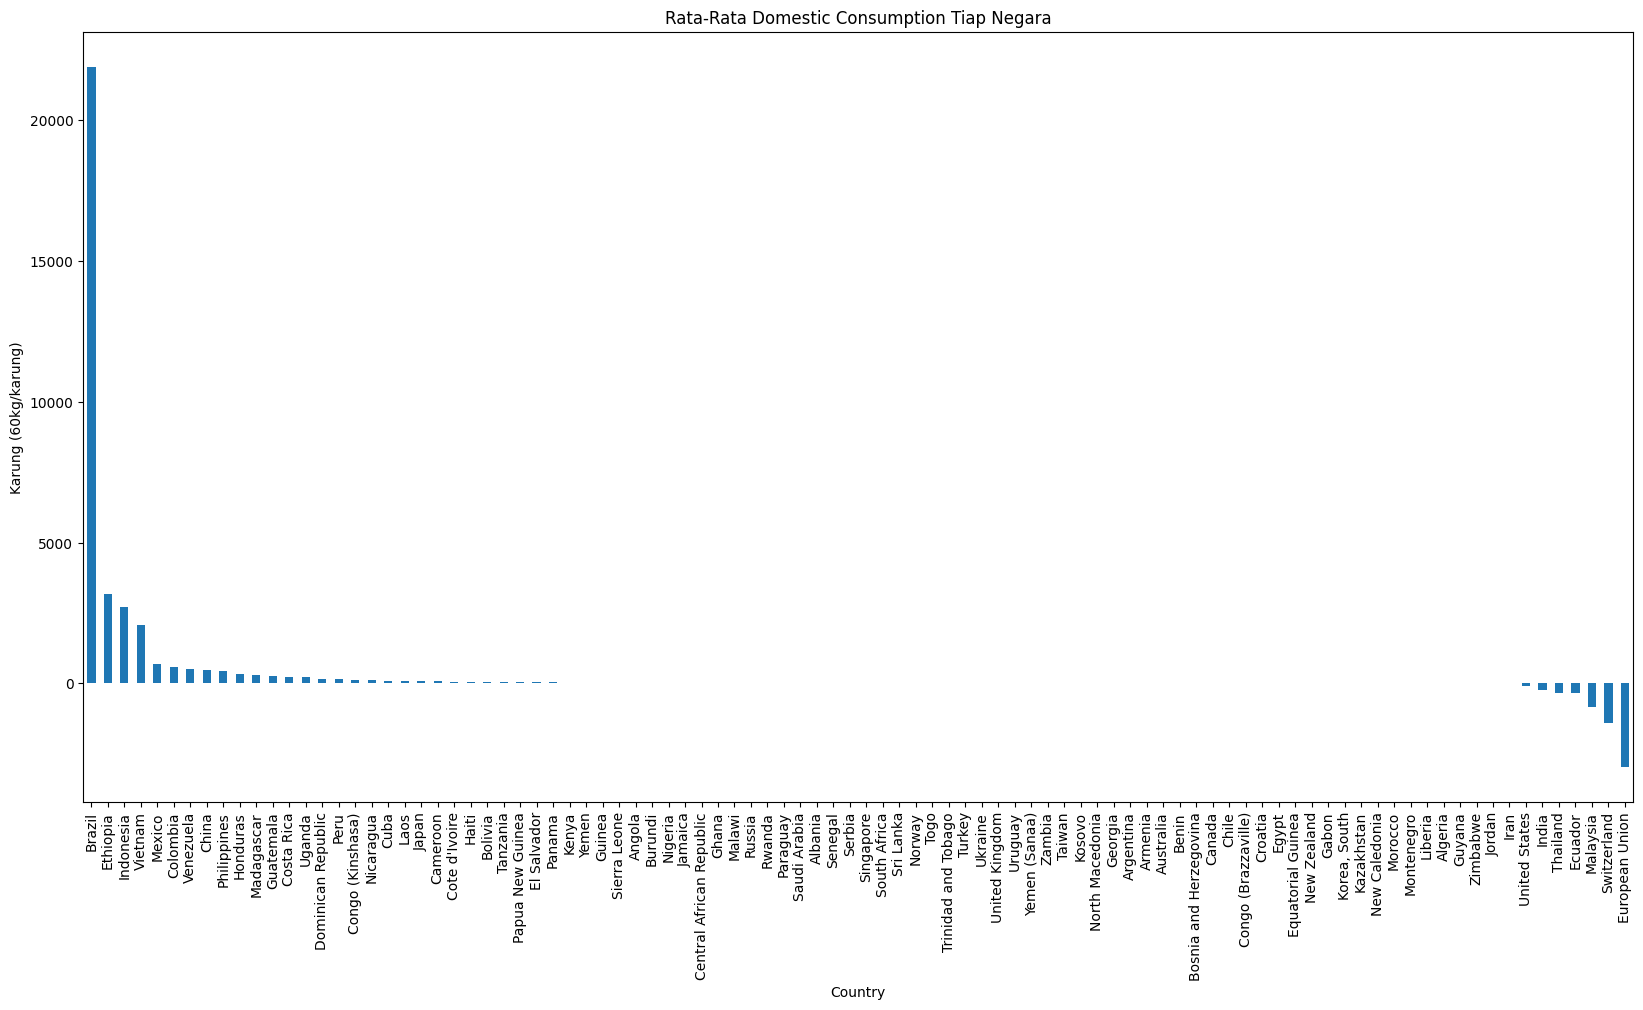

In [166]:
import matplotlib.pyplot as plt

axes_mean = average_sorted.plot(kind='bar', title='Rata-Rata Domestic Consumption Tiap Negara', figsize=(20,10))
axes_mean.set(xlabel='Country', ylabel='Karung (60kg/karung)')
plt.show()

Dari hasil perhitungan, didapatkan bahwa Brazil adalah negara yang memiliki domestic consumption yang paling tinggi dengan jumlah konsumsi rata-rata kopi nya adalah 21877 karung, diikuti oleh Ethiopia sebanyak 3190 karung, dan posisi ketiga terdapat Indonesia dengan jumlah sebanyak 2709 karung tiap tahunnya.

In [104]:
median = group_country['Clean Domestic Consumption'].median()
median_sorted = median.sort_values(ascending=False)
print(median_sorted.head(10))

Country
Brazil         22265.0
Ethiopia        3140.0
Indonesia       2624.0
Vietnam         2000.0
Colombia         814.0
Mexico           725.0
China            527.0
Venezuela        499.0
Philippines      450.0
Honduras         345.0
Name: Clean Domestic Consumption, dtype: float64


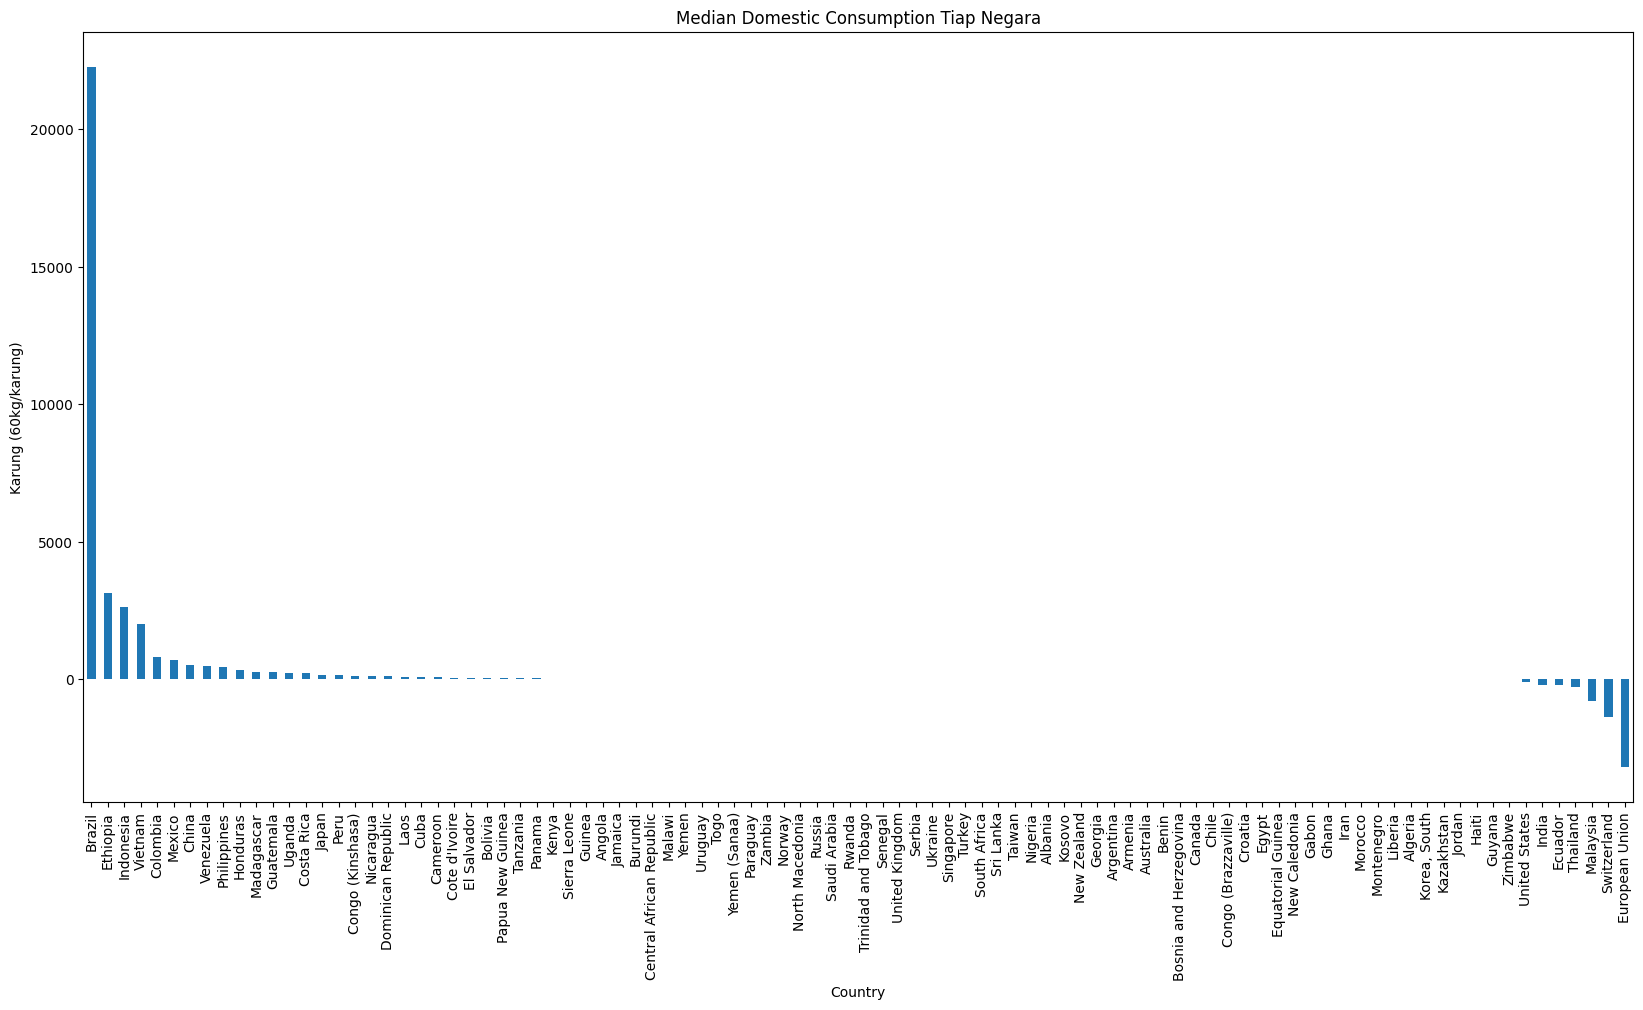

In [167]:
axes_median = median_sorted.plot(kind='bar', title='Median Domestic Consumption Tiap Negara', figsize=(20,10))
axes_median.set(xlabel='Country', ylabel='Karung (60kg/karung)')
plt.show()

Data di atas adalah median dari domestic consumption pada tiap negara

## 2. Negara yang mengekspor kopi terbanyak

In [118]:
# Perhitungan nilai ekspor kopi tiap negara
max_export = group_country['Exports'].max()
max_export_sorted = max_export.sort_values(ascending=False)
print(max_export_sorted.head(10))

Country
Brazil            45675
Vietnam           29907
Colombia          13755
Indonesia         10380
India              7258
Honduras           7225
Uganda             6515
Ethiopia           4831
European Union     4695
Peru               4293
Name: Exports, dtype: int64


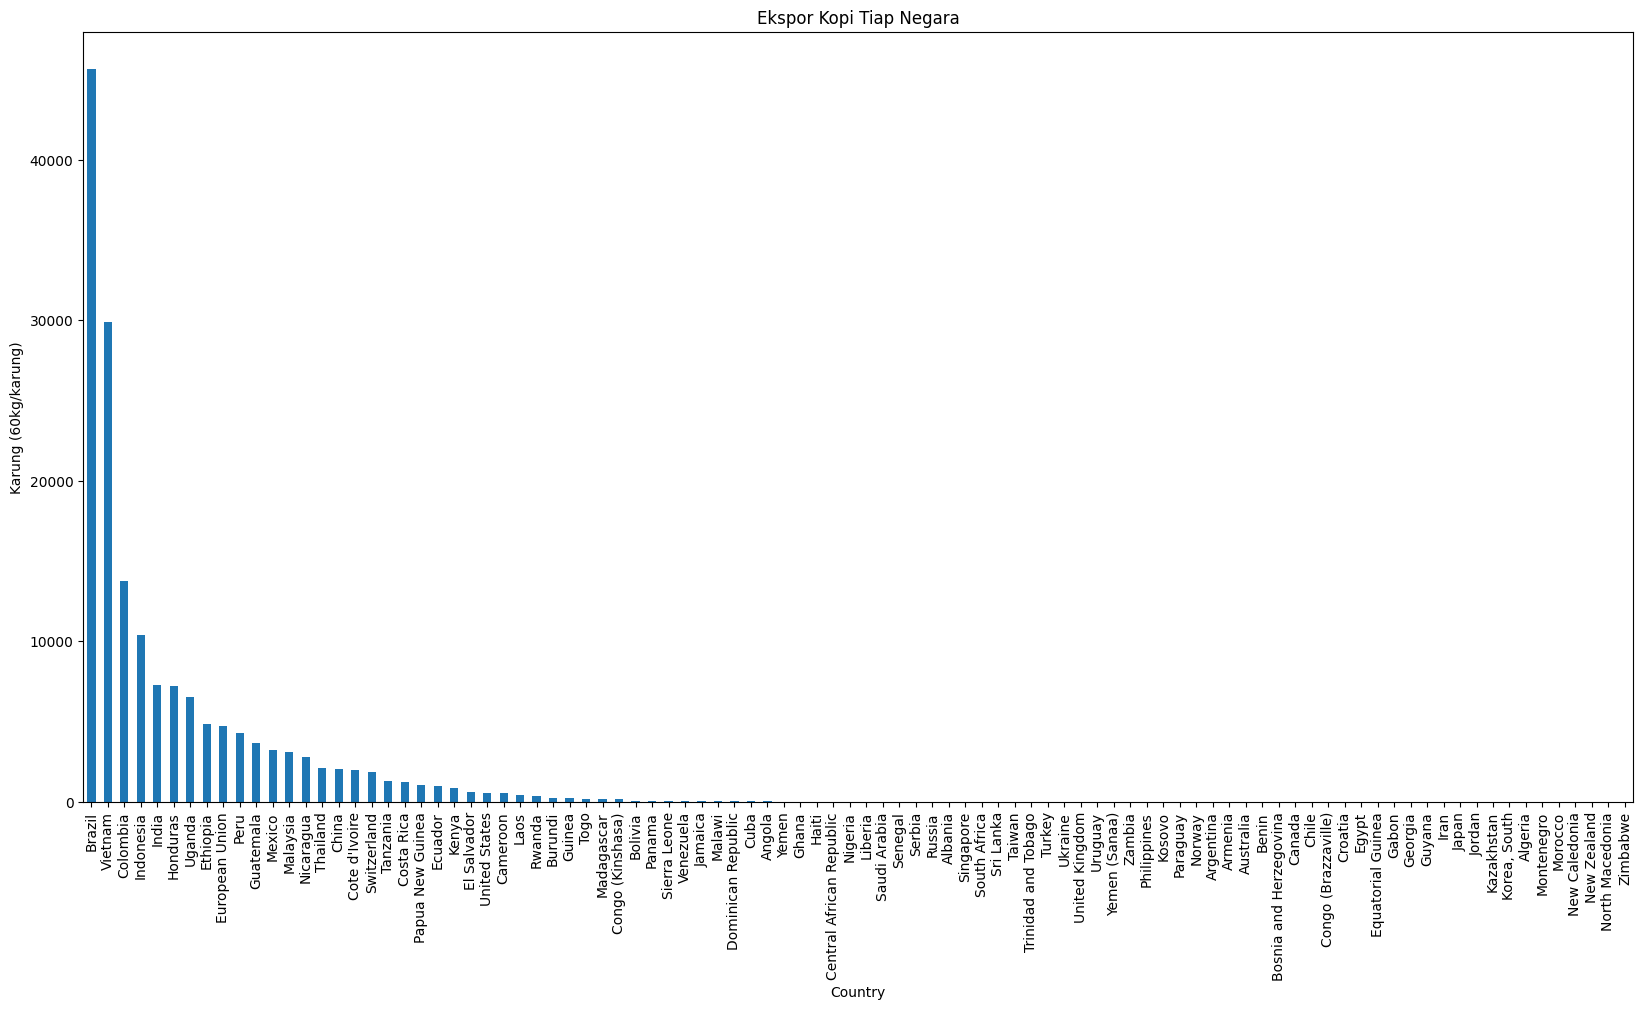

In [168]:
# Pembuatan grafik nilai ekspor kopi tiap negara
axes_max_export = max_export_sorted.plot(kind='bar', title='Ekspor Kopi Tiap Negara', figsize=(20,10))
axes_max_export.set(xlabel='Country', ylabel='Karung (60kg/karung)')
plt.show()

Dari data di atas, terlihat bahwa negara yang mengekspor kopi terbanyak dalam waktu 1 dekade ini adalah negara Brazil sebanyak 45675 karung, diikuti dengan Vietnam sebanyak 29907 karung, dan diperingkat ketiga adalah Colombia sebanyak 13755 karung.

## 3. Negara yang mengimpor kopi terbanyak

In [119]:
# Perhitungan nilai impor kopi tiap negara
max_import = group_country['Imports'].max()
max_import_sorted = max_import.sort_values(ascending=False)
print(max_import_sorted.head(10))

Country
European Union    47000
United States     28020
Japan              8320
Philippines        6540
Canada             5400
Russia             4945
United Kingdom     4260
China              4230
Switzerland        3500
Korea, South       3405
Name: Imports, dtype: int64


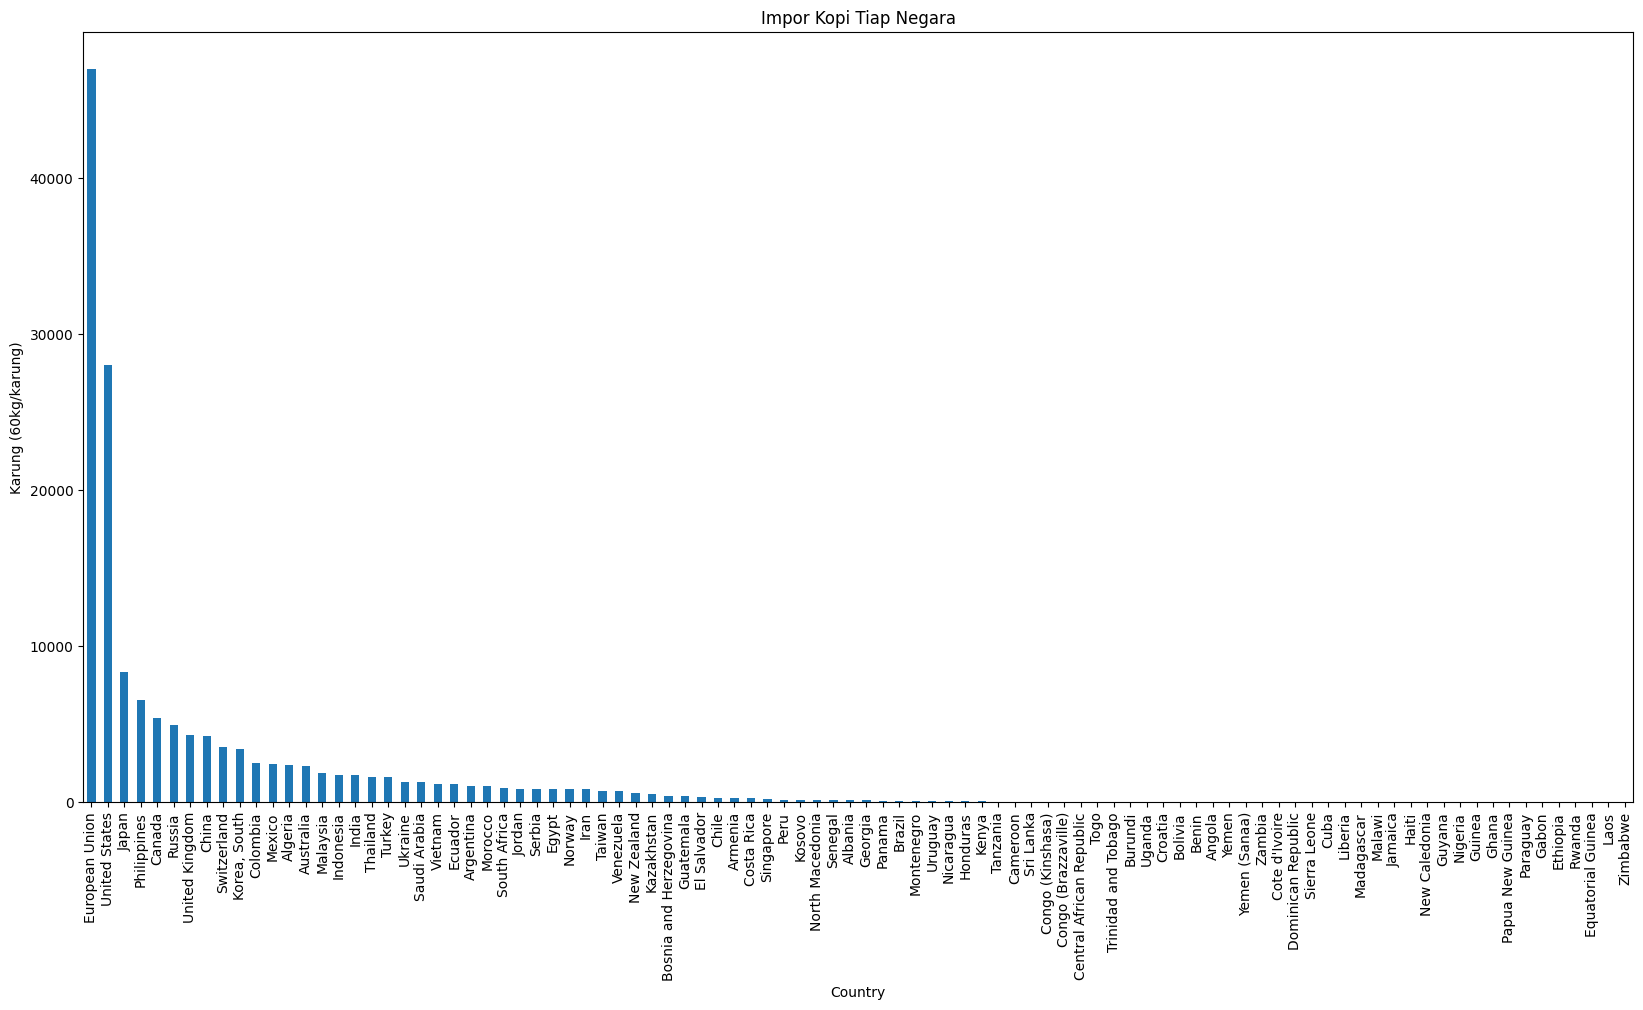

In [169]:
# Pembuatan grafik nilai impor kopi tiap negara

axes_max_import = max_import_sorted.plot(kind='bar', title='Impor Kopi Tiap Negara', figsize=(20,10))
axes_max_import.set(xlabel='Country', ylabel='Karung (60kg/karung)')
plt.show()

Dari data di atas, terlihat bahwa negara yang mengimpor kopi terbanyak dalam waktu 1 dekade ini adalah negara European Union dengan jumlah sebanyak 47000 karung, United States 28020 karung, dan Japan 8320 karung.

## 4. Negara yang memproduksi kopi terbanyak

In [121]:
max_prod = group_country['Production'].max()
max_prod_sorted = max_prod.sort_values(ascending=False)
print(max_prod_sorted.head(10))

Country
Brazil       69900
Vietnam      31580
Colombia     14600
Indonesia    12100
Ethiopia      8350
Honduras      7600
Uganda        6850
India         5950
Peru          4390
Mexico        4090
Name: Production, dtype: int64


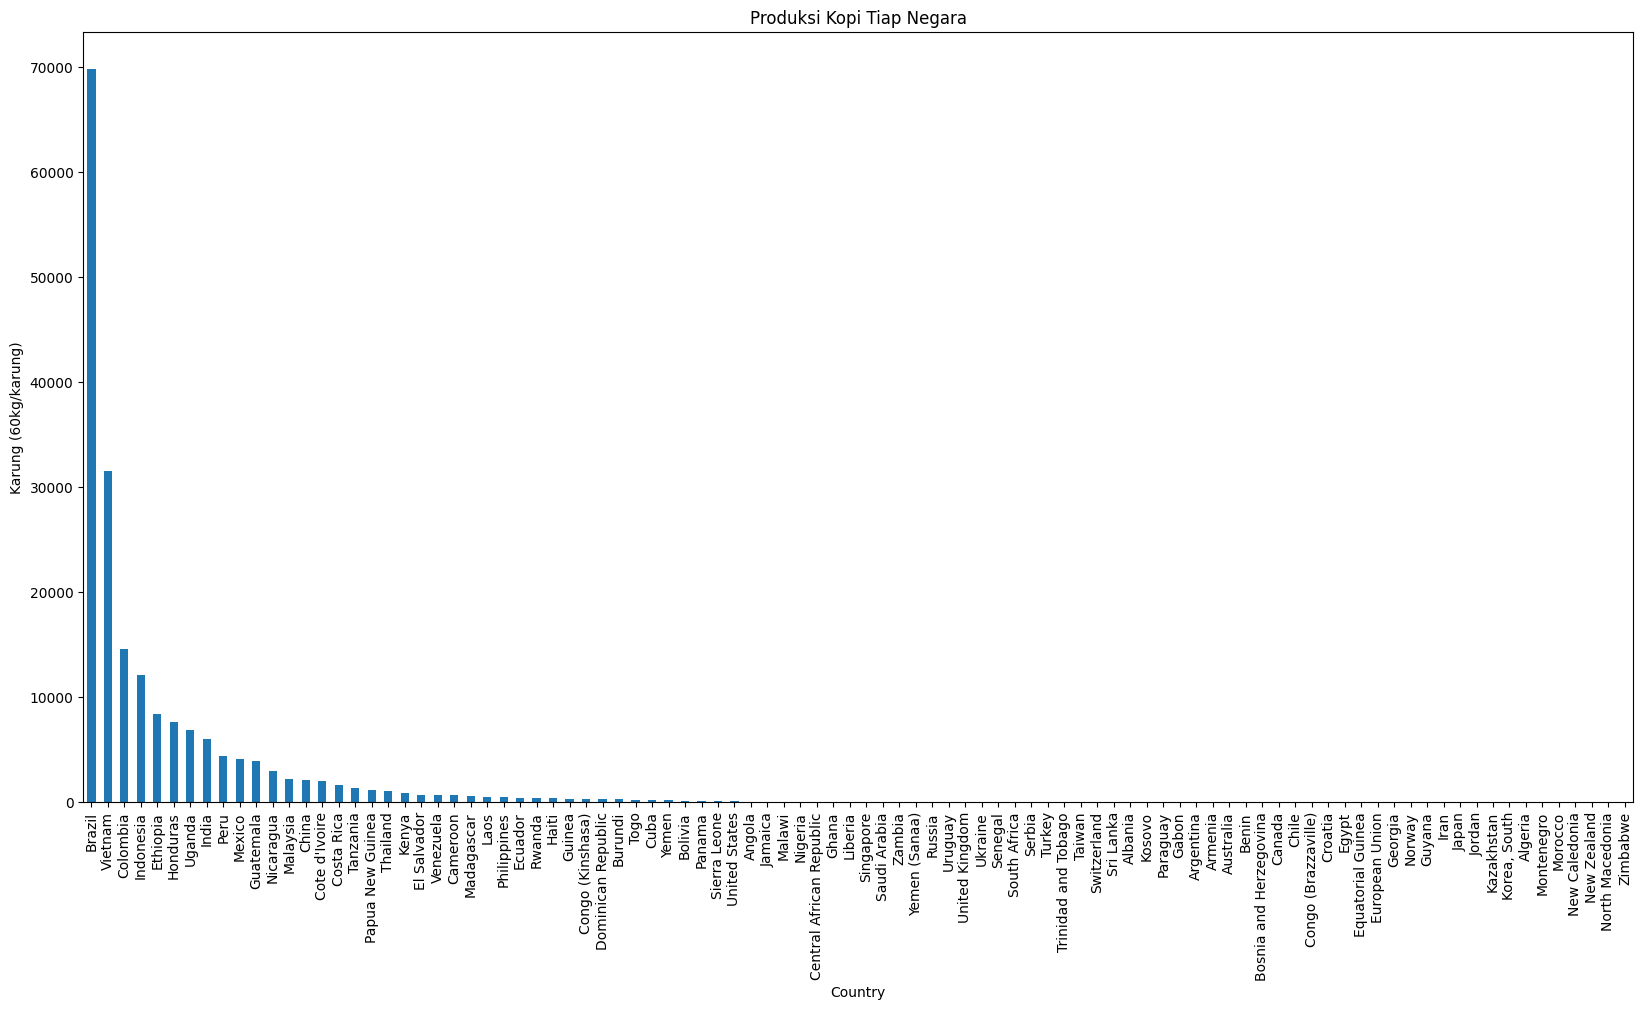

In [170]:
axes_max_prod = max_prod_sorted.plot(kind='bar', title='Produksi Kopi Tiap Negara', figsize=(20,10))
axes_max_prod.set(xlabel='Country', ylabel='Karung (60kg/karung)')
plt.show()

Dari data yang telah didapatkan, produksi kopi terbanyak adalah Brazil sebanyak 69900 karung, lalu diikuti oleh Vietnam sebanyak 31580 karung, lalu Colombia sebanyak 14600 karung.

## 5. Seiring berjalannya waktu, apakah jumlah kopi yang dikonsumsi meningkat di negara Indonesia?

In [152]:
# Memfilter data menjadi data yang hanya mencakup negara Indonesia saja
data_indo = df_clean.loc[df_clean['Country'] == 'Indonesia']

data_indo

,Country,Year,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Production,Total Distribution,Total Supply,Clean Domestic Consumption
429,Indonesia,2013,98,2540,48,10380,970,11900,12968,12968,1570
430,Indonesia,2014,48,2900,53,8720,1155,10470,11673,11673,1745
431,Indonesia,2015,53,3175,46,9896,964,12100,13117,13117,2211
432,Indonesia,2016,46,3203,12,8174,743,10600,11389,11389,2460
433,Indonesia,2017,12,3560,593,8010,1751,10400,12163,12163,1809
434,Indonesia,2018,593,4300,2419,6150,1676,10600,12869,12869,2624
435,Indonesia,2019,2419,4900,2298,7152,1231,10700,14350,14350,3669
436,Indonesia,2020,2298,4450,1669,7872,993,10700,13991,13991,3457
437,Indonesia,2021,1669,4750,1056,7428,985,10580,13234,13234,3765
438,Indonesia,2022,1056,4770,691,8792,1347,11850,14253,14253,3423


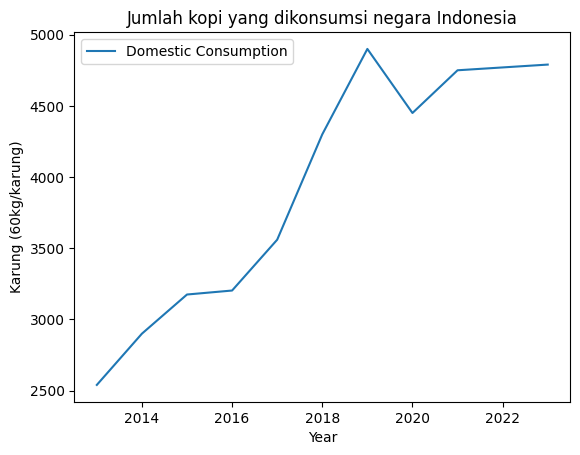

In [138]:
# Membuat grafik untuk data domestic consumptions negara Indonesia
axes_data_indo = data_indo.plot(x='Year', y='Domestic Consumption', kind= 'line', title='Jumlah kopi yang dikonsumsi negara Indonesia')
axes_data_indo.set(xlabel='Year', ylabel='Karung (60kg/karung)')

plt.show()

Dari data yang didapatkan, terlihat bahwa dalam 1 dekade terakhir, konsumsi kopi di Indonesia cenderung naik dimana pada tahun 2019 adalah puncak konsumtif kopi di negara Indonesia sebanyak 4900 karung.

## 6. Negara mana yang memiliki nilai ekspor yang lebih baik, Colombia atau Indonesia?

Sampel yang diambil adalah negara Indonesia dan Colombia karena memiliki jumlah produksi dan jumlah ekspor yang cukup dekat. Oleh karena itu, akan dilakukan Two-Sample Independent Test untuk mengujinya.

In [162]:
from scipy import stats
import numpy as np

ekspor_indo = df_clean[df_clean['Country']=='Indonesia'][['Year','Exports']].groupby(['Year']).sum()
ekspor_colombia = df_clean[df_clean['Country']=='Colombia'][['Year', 'Exports']].groupby(['Year']).sum()


In [161]:
print('Rata-rata ekspor kopi negara Indonesia adalah: ', ekspor_indo['Exports'].mean(), 'karung')
print('Rata-rata ekspor kopi negara Colombia adalah: ', ekspor_colombia['Exports'].mean() , 'karung')

Rata-rata ekspor kopi negara Indonesia adalah:  8056.727272727273 karung
Rata-rata ekspor kopi negara Colombia adalah:  12433.636363636364 karung


Pengeksporan rata-rata kopi Colombia lebih besar dari Indonesia. Berarti performa pengeksporan Colombia lebih baik satu dekade ke belakang daripada Indonesia. Karena ingin menguji perbedaan signifikan antara penjualan di Colombia dan Indonesia dari data sampel satu dekade kebelakang

H0: Rata-rata pengeksporan tahunan Indonesia == Colombia

H1: Rata-rata pengeksporan tahunan Indonesia != Colombia

In [163]:
t_stat, p_val = stats.ttest_ind(ekspor_indo['Exports'],ekspor_colombia['Exports'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) #

T-Statistic: -8.755993962066409
P-value: 2.8106898678214006e-08


Dari hasil perhitungan, p-value bernilai 2.81 yang lebih besar dari critical value, yaitu 0.05, artinya asumsi H0 ditolak. Maka dari itu, rata-rata pengeksporan tahunan Indonesia tidak sama dengan pengeksporan Colombia.

# E. Conclusions

1. Dari hasil perhitungan, didapatkan bahwa Brazil adalah negara yang memiliki domestic consumption yang paling tinggi dengan jumlah konsumsi rata-rata kopi nya adalah 21877 karung, diikuti oleh Ethiopia sebanyak 3190 karung, dan posisi ketiga terdapat Indonesia dengan jumlah sebanyak 2709 karung tiap tahunnya. 

2. Dari data di atas, terlihat bahwa negara yang mengekspor kopi terbanyak dalam waktu 1 dekade ini adalah negara Brazil sebanyak 45675 karung, diikuti dengan Vietnam sebanyak 29907 karung, dan diperingkat ketiga adalah Colombia sebanyak 13755 karung.

3.  Dari data di atas, terlihat bahwa negara yang mengimpor kopi terbanyak dalam waktu 1 dekade ini adalah negara European Union dengan jumlah sebanyak 47000 karung, United States 28020 karung, dan Japan 8320 karung.

4. Dari data yang telah didapatkan, produksi kopi terbanyak adalah Brazil sebanyak 69900 karung, lalu diikuti oleh Vietnam sebanyak 31580 karung, lalu Colombia sebanyak 14600 karung.

5. Dari data yang didapatkan, terlihat bahwa dalam 1 dekade terakhir, konsumsi kopi di Indonesia cenderung naik dimana pada tahun 2019 adalah puncak konsumtif kopi di negara Indonesia sebanyak 4900 karung.

6. Dari hasil perhitungan, p-value bernilai 2.81 yang lebih besar dari critical value, yaitu 0.05, artinya asumsi H0 ditolak. Maka dari itu, rata-rata pengeksporan tahunan Indonesia tidak sama dengan pengeksporan Colombia.



In [165]:
# Penyimpanan dataframe yang sudah bersih untuk diproses di tableau
df_clean.to_csv("clean_psd_coffee.csv", index=False)